# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [217]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
import csv

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [218]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

596

In [219]:
#print cities for sanity check
#print(cities)

In [220]:
#create a sample response to look at how data is arranged in json
data_to_keep = ['city_name', 'lat', 'long', 'max_temp', 'cloudiness', 'wind_speed', 'humidity', 'country', 'date']
sample_req = requests.get(query_url+"kangaatsiaq").json()
data_to_keep.append(sample_req['name'])
data_to_keep.append(sample_req['coord']['lat'])
data_to_keep.append(sample_req['coord']['lon'])
data_to_keep.append(sample_req['main']['temp_max'])
data_to_keep.append(sample_req['clouds']['all'])
data_to_keep.append(sample_req['wind']['speed'])
data_to_keep.append(sample_req['main']['humidity'])
data_to_keep.append(sample_req['sys']['country'])
data_to_keep.append(sample_req['dt'])
print(data_to_keep)


['city_name', 'lat', 'long', 'max_temp', 'cloudiness', 'wind_speed', 'humidity', 'country', 'date', 'Kangaatsiaq', 68.3065, -53.4641, -2.04, 100, 3.91, 71, 'GL', 1619248959]


In [221]:
sample_req = requests.get(query_url+"kangaatsiaq").json()
print(sample_req)

{'coord': {'lon': -53.4641, 'lat': 68.3065}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': -2.04, 'feels_like': -6.72, 'temp_min': -2.04, 'temp_max': -2.04, 'pressure': 1019, 'humidity': 71, 'sea_level': 1019, 'grnd_level': 1019}, 'visibility': 10000, 'wind': {'speed': 3.91, 'deg': 87, 'gust': 4.27}, 'clouds': {'all': 100}, 'dt': 1619248959, 'sys': {'country': 'GL', 'sunrise': 1619247517, 'sunset': 1619309096}, 'timezone': -7200, 'id': 3422683, 'name': 'Kangaatsiaq', 'cod': 200}


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [222]:
#million+1 th attempt
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

query_url = f"{url}appid={weather_api_key}&units={units}&q="

#loop set up
city_name = []
lat = []
lon = []
max_temp = []
cloudiness = []
wind_speed = []
humidity = []
country = []
date = []

for city in cities:
    try:
        keep_response = requests.get(query_url + city).json()
        city_name.append(keep_response['name'])
        lat.append(keep_response['coord']['lat'])
        lon.append(keep_response['coord']['lon'])
        max_temp.append(keep_response['main']['temp_max'])
        cloudiness.append(keep_response['clouds']['all'])
        wind_speed.append(keep_response['wind']['speed'])
        humidity.append(keep_response['main']['humidity'])
        country.append(keep_response['sys']['country'])
        date.append(keep_response['dt'])
        print(f'processing record for: {city}')
    
    except KeyError:
        print('records missing for {city} skipping...')

print('done')
print(len(city_names))
print(len(lat))
print(len(lon))
print(len(max_temp))
print(len(humidity))
print(len(cloudiness))
print(len(wind_speed))
print(len(country))
print(len(date))

processing record for: chuy
processing record for: rikitea
records missing for {city} skipping...
processing record for: soars
processing record for: mayumba
processing record for: paamiut
processing record for: petropavl
processing record for: hithadhoo
processing record for: touros
processing record for: hobart
processing record for: winnemucca
processing record for: kodinsk
processing record for: tomatlan
processing record for: baghdad
processing record for: mar del plata
processing record for: chengde
processing record for: ljungby
processing record for: kununurra
processing record for: cidreira
processing record for: padang
processing record for: bredasdorp
processing record for: kaitangata
processing record for: lazaro cardenas
processing record for: verkhnevilyuysk
processing record for: ilhabela
processing record for: ribeira grande
processing record for: east london
processing record for: tuatapere
processing record for: zhangye
processing record for: castro
records missing fo

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [223]:

weather_dict = {
    "city": city_name,
    "latitude": lat,
    "longitude": lon,
    "max_temperature": max_temp,
    "cloudiness": cloudiness,
    "wind_speed": wind_speed,
    "humidity": humidity,
    "country": country,
    "date": date
}
weather_df = pd.DataFrame(weather_dict)
weather_df.to_csv('cities.csv')
weather_df.head()


,city,latitude,longitude,max_temperature,cloudiness,wind_speed,humidity,country,date
0,Chui,-33.6971,-53.4616,17.07,21,3.66,95,UY,1619249002
1,Rikitea,-23.1203,-134.9692,25.40,100,6.85,79,PF,1619248990
2,Şoarş,45.9333,24.9167,11.00,0,1.03,40,RO,1619249003
3,Mayumba,-3.4320,10.6554,25.95,100,1.58,77,GA,1619249004
4,Paamiut,61.9940,-49.6678,2.32,0,2.14,68,GL,1619249004


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [224]:
high_humidity = weather_df['humidity'] >= 101
print(high_humidity.value_counts())

False    548
Name: humidity, dtype: int64


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

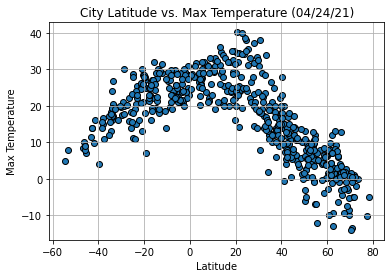

In [227]:
plt.scatter(weather_df['latitude'], weather_df['max_temperature'], edgecolors='black')
plt.title('City Latitude vs. Max Temperature (04/24/21)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.grid()
plt.show()

## Latitude vs. Humidity Plot

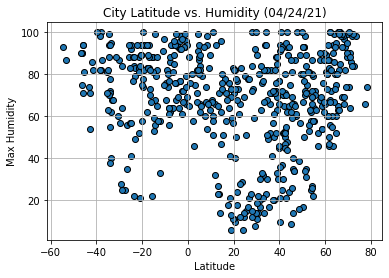

In [228]:
plt.scatter(weather_df['latitude'], weather_df['humidity'], edgecolors='black')
plt.title('City Latitude vs. Humidity (04/24/21)')
plt.xlabel('Latitude')
plt.ylabel('Max Humidity')
plt.grid()
plt.show()

## Latitude vs. Cloudiness Plot

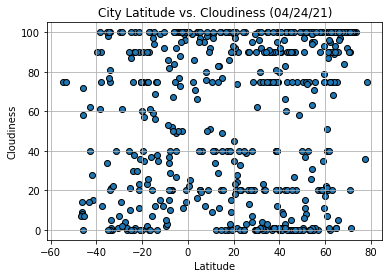

In [229]:
plt.scatter(weather_df['latitude'], weather_df['cloudiness'], edgecolors='black')
plt.title('City Latitude vs. Cloudiness (04/24/21)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid()
plt.show()

## Latitude vs. Wind Speed Plot

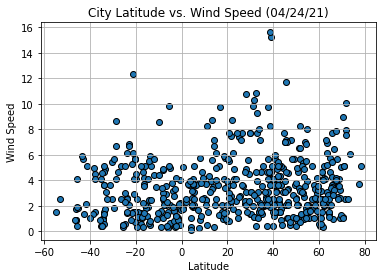

In [230]:
plt.scatter(weather_df['latitude'], weather_df['wind_speed'], edgecolors='black')
plt.title('City Latitude vs. Wind Speed (04/24/21)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid()
plt.show()

## Linear Regression

In [231]:
#split the data up by latitude- northern hemisphere
northern_hem = weather_df.loc[weather_df['latitude'] > 0, :]
northern_hem.head()

,city,latitude,longitude,max_temperature,cloudiness,wind_speed,humidity,country,date
2,Şoarş,45.9333,24.9167,11.00,0,1.03,40,RO,1619249003
4,Paamiut,61.9940,-49.6678,2.32,0,2.14,68,GL,1619249004
5,Petropavl,54.8753,69.1628,12.00,0,8.00,22,KZ,1619249005
9,Winnemucca,40.9730,-117.7357,15.00,1,5.66,25,US,1619249006
10,Kodinsk,58.6881,99.1844,6.46,100,2.54,65,RU,1619249006


In [232]:
#split the data up by latitude- southern hemisphere
southern_hem = weather_df.loc[weather_df['latitude'] < 0, :]
southern_hem.head()

,city,latitude,longitude,max_temperature,cloudiness,wind_speed,humidity,country,date
0,Chui,-33.6971,-53.4616,17.07,21,3.66,95,UY,1619249002
1,Rikitea,-23.1203,-134.9692,25.40,100,6.85,79,PF,1619248990
3,Mayumba,-3.4320,10.6554,25.95,100,1.58,77,GA,1619249004
6,Hithadhoo,-0.6000,73.0833,28.36,100,2.25,69,MV,1619249005
7,Touros,-5.1989,-35.4608,24.00,40,2.06,94,BR,1619248798


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value for Northern Hemisphere: City Latitude vs. Max Temperature is -0.8677724659933209


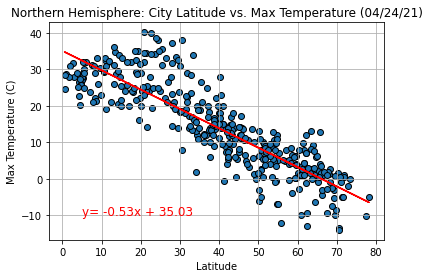

In [233]:

#linear regress
x_values = northern_hem['latitude']
y_values = northern_hem['max_temperature']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))

res = st.linregress(northern_hem['latitude'], northern_hem['max_temperature'])
print(f'The r-value for Northern Hemisphere: City Latitude vs. Max Temperature is {res.rvalue}')

plt.scatter(northern_hem['latitude'], northern_hem['max_temperature'], edgecolors='black')
plt.title('Northern Hemisphere: City Latitude vs. Max Temperature (04/24/21)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid()
plt.annotate(line_eq, (5,-10), fontsize=12, color='red')
plt.plot(northern_hem['latitude'], res.intercept + res.slope*northern_hem['latitude'], 'r', label='fitted line')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value for Southern Hemisphere: City Latitude vs. Max Temperature is 0.712550820600401


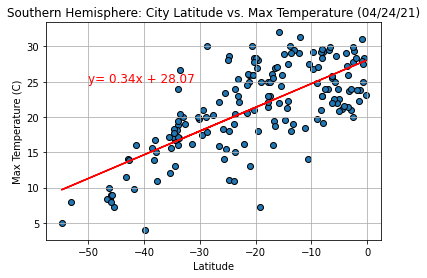

In [234]:
#linear regress
x_values = southern_hem['latitude']
y_values = southern_hem['max_temperature']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))

res = st.linregress(southern_hem['latitude'], southern_hem['max_temperature'])
print(f'The r-value for Southern Hemisphere: City Latitude vs. Max Temperature is {res.rvalue}')

plt.scatter(southern_hem['latitude'], southern_hem['max_temperature'], edgecolors='black')
plt.title('Southern Hemisphere: City Latitude vs. Max Temperature (04/24/21)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid()
plt.annotate(line_eq, (-50,25), fontsize=12, color='red')
plt.plot(southern_hem['latitude'], res.intercept + res.slope*southern_hem['latitude'], 'r', label='fitted line')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value for Northern Hemisphere: City Latitude vs. Humidity is 0.21786138138443964


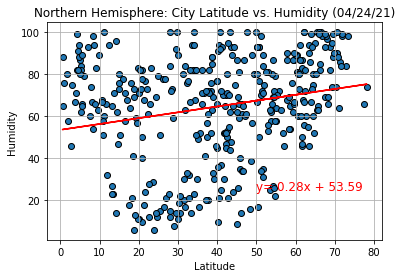

In [235]:
#linear regress
x_values = northern_hem['latitude']
y_values = northern_hem['humidity']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))

res = st.linregress(northern_hem['latitude'], northern_hem['humidity'])
print(f'The r-value for Northern Hemisphere: City Latitude vs. Humidity is {res.rvalue}')

plt.scatter(northern_hem['latitude'], northern_hem['humidity'], edgecolors='black')
plt.title('Northern Hemisphere: City Latitude vs. Humidity (04/24/21)')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid()
plt.annotate(line_eq, (50,25), fontsize=12, color='red')
plt.plot(northern_hem['latitude'], res.intercept + res.slope*northern_hem['latitude'], 'r', label='fitted line')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value for Southern Hemisphere: City Latitude vs. Humidity is 0.03613284001423087


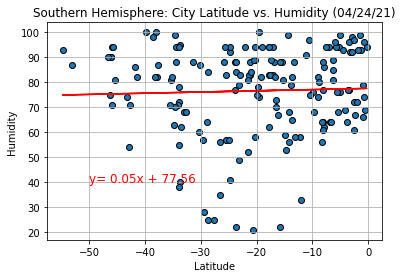

In [236]:
#linear regress
x_values = southern_hem['latitude']
y_values = southern_hem['humidity']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))

res = st.linregress(southern_hem['latitude'], southern_hem['humidity'])
print(f'The r-value for Southern Hemisphere: City Latitude vs. Humidity is {res.rvalue}')

plt.scatter(southern_hem['latitude'], southern_hem['humidity'], edgecolors='black')
plt.title('Southern Hemisphere: City Latitude vs. Humidity (04/24/21)')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid()
plt.annotate(line_eq, (-50,40), fontsize=12, color='red')
plt.plot(southern_hem['latitude'], res.intercept + res.slope*southern_hem['latitude'], 'r', label='fitted line')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value for Northern Hemisphere: City Latitude vs. Cloudiness is 0.15388386773880028


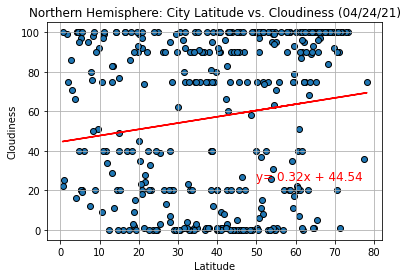

In [237]:
#linear regress
x_values = northern_hem['latitude']
y_values = northern_hem['cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))

res = st.linregress(northern_hem['latitude'], northern_hem['cloudiness'])
print(f'The r-value for Northern Hemisphere: City Latitude vs. Cloudiness is {res.rvalue}')

plt.scatter(northern_hem['latitude'], northern_hem['cloudiness'], edgecolors='black')
plt.title('Northern Hemisphere: City Latitude vs. Cloudiness (04/24/21)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid()
plt.annotate(line_eq, (50,25), fontsize=12, color='red')
plt.plot(northern_hem['latitude'], res.intercept + res.slope*northern_hem['latitude'], 'r', label='fitted line')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value for Southern Hemisphere: City Latitude vs. Cloudiness is 0.2324310171526967


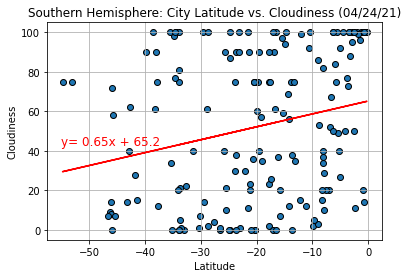

In [246]:
#linear regress
x_values = southern_hem['latitude']
y_values = southern_hem['cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))

res = st.linregress(southern_hem['latitude'], southern_hem['cloudiness'])
print(f'The r-value for Southern Hemisphere: City Latitude vs. Cloudiness is {res.rvalue}')

plt.scatter(southern_hem['latitude'], southern_hem['cloudiness'], edgecolors='black')
plt.title('Southern Hemisphere: City Latitude vs. Cloudiness (04/24/21)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid()
plt.annotate(line_eq, (-55,43), fontsize=12, color='red')
plt.plot(southern_hem['latitude'], res.intercept + res.slope*southern_hem['latitude'], 'r', label='fitted line')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value for Northern Hemisphere: City Latitude vs. Wind Speed is 0.011739239798793124


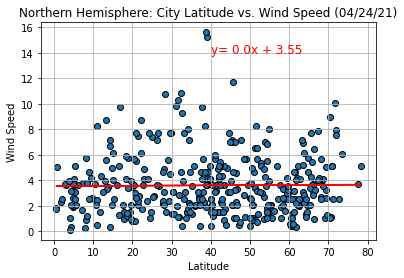

In [239]:
#linear regress
x_values = northern_hem['latitude']
y_values = northern_hem['wind_speed']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))

res = st.linregress(northern_hem['latitude'], northern_hem['wind_speed'])
print(f'The r-value for Northern Hemisphere: City Latitude vs. Wind Speed is {res.rvalue}')

plt.scatter(northern_hem['latitude'], northern_hem['wind_speed'], edgecolors='black')
plt.title('Northern Hemisphere: City Latitude vs. Wind Speed (04/24/21)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid()
plt.annotate(line_eq, (40,14), fontsize=12, color='red')
plt.plot(northern_hem['latitude'], res.intercept + res.slope*northern_hem['latitude'], 'r', label='fitted line')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value for Southern Hemisphere: City Latitude vs. Wind Speed is -0.04974920578210155


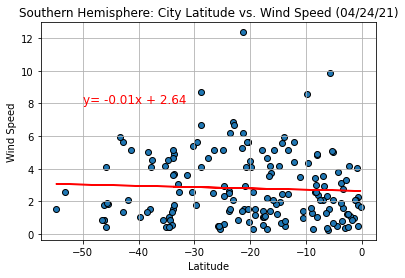

In [240]:
#linear regress
x_values = southern_hem['latitude']
y_values = southern_hem['wind_speed']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))

res = st.linregress(southern_hem['latitude'], southern_hem['wind_speed'])
print(f'The r-value for Southern Hemisphere: City Latitude vs. Wind Speed is {res.rvalue}')

plt.scatter(southern_hem['latitude'], southern_hem['wind_speed'], edgecolors='black')
plt.title('Southern Hemisphere: City Latitude vs. Wind Speed (04/24/21)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid()
plt.annotate(line_eq, (-50,8), fontsize=12, color='red')
plt.plot(southern_hem['latitude'], res.intercept + res.slope*southern_hem['latitude'], 'r', label='fitted line')
plt.show()